# Análisis Exploratorio de Datos (EDA) – Métricas de Cuestionarios

Este notebook tiene como objetivo realizar un **Análisis Exploratorio de Datos (EDA)** sobre las métricas de interacción de los alumnos con los cuestionarios. El EDA es una etapa fundamental previa al modelado predictivo, que permite:

- Detectar errores y valores atípicos
- Comprender mejor el comportamiento de los estudiantes
- Identificar relaciones entre variables
- Evaluar la calidad y utilidad de las métricas recogidas

---

## 1. Carga de datos y resumen inicial

In [1]:

import pandas as pd

df = pd.read_csv("/home/carlos/Documentos/TFG/spark-workspace/data/datasets/metricas_quiz.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   userid                        198 non-null    object 
 1   quiz_total_submits            198 non-null    int64  
 2   quizes_submitted_firstMonth   198 non-null    int64  
 3   quizes_submitted_secondMonth  198 non-null    int64  
 4   quizes_submitted_thirdMonth   198 non-null    int64  
 5   quizes_submitted_fourthMonth  198 non-null    int64  
 6   quiz_max_days_without_submit  198 non-null    int64  
 7   quiz_attempt_ratio            198 non-null    float64
dtypes: float64(1), int64(6), object(1)
memory usage: 12.5+ KB


,quiz_total_submits,quizes_submitted_firstMonth,quizes_submitted_secondMonth,quizes_submitted_thirdMonth,quizes_submitted_fourthMonth,quiz_max_days_without_submit,quiz_attempt_ratio
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,12.191919,6.207071,2.858586,2.898990,0.146465,27.065657,1.980189
std,6.844430,3.616453,3.004261,1.999974,1.044085,27.423928,1.538944
min,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000
25%,7.000000,4.250000,1.000000,1.000000,0.000000,13.000000,1.200000
50%,12.000000,6.000000,3.000000,3.000000,0.000000,19.500000,1.500000
75%,15.000000,7.000000,4.000000,4.000000,0.000000,35.750000,2.250000
max,42.000000,24.000000,20.000000,12.000000,13.000000,256.000000,12.571429


## 2. Distribuciones individuales

Visualizamos la distribución de cada métrica para comprender su forma y detectar posibles sesgos o valores extremos.

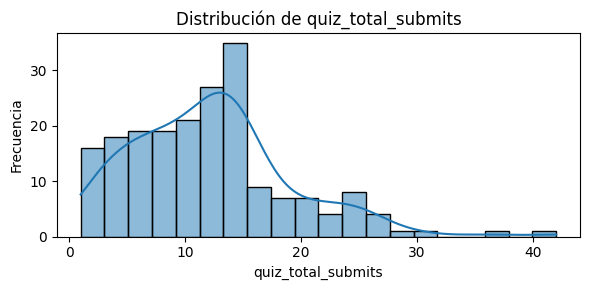

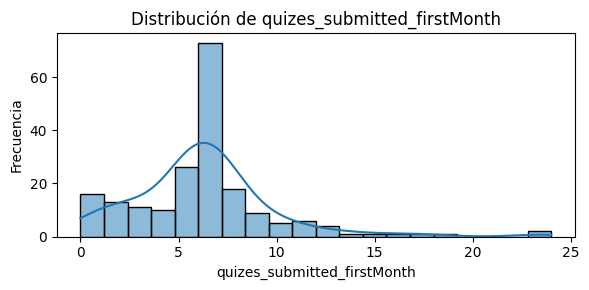

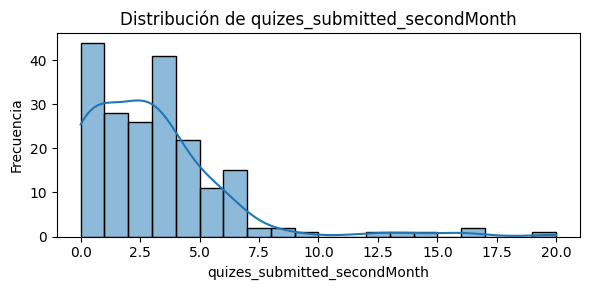

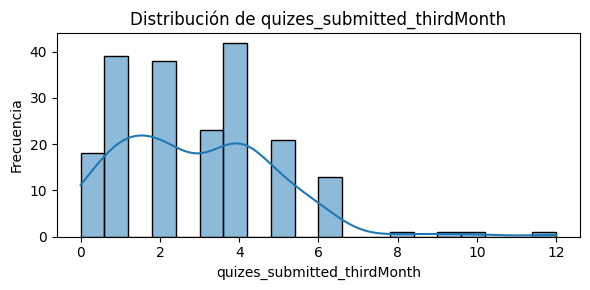

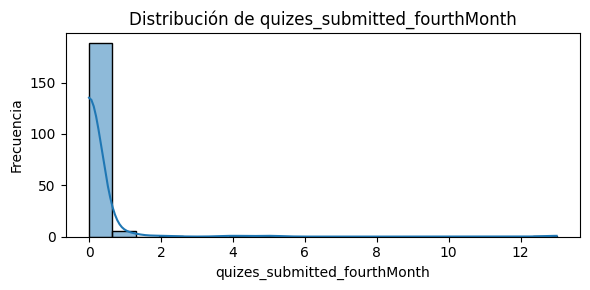

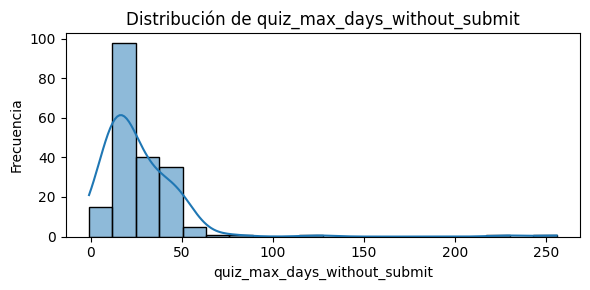

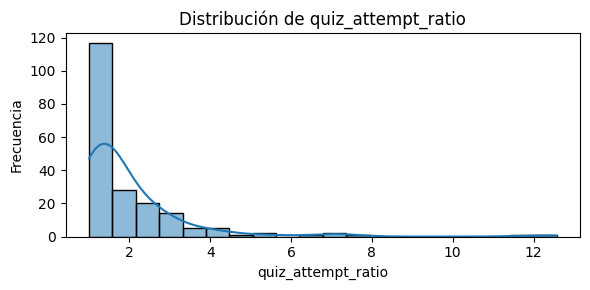

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['quiz_total_submits', 'quizes_submitted_firstMonth', 'quizes_submitted_secondMonth', 'quizes_submitted_thirdMonth', 'quizes_submitted_fourthMonth', 'quiz_max_days_without_submit', 'quiz_attempt_ratio']
for column in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()


## 3. Matriz de correlación

Exploramos posibles correlaciones lineales entre métricas que puedan indicar redundancia o relaciones interesantes.

In [1]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre métricas")
plt.show()


NameError: name 'plt' is not defined

## 4. Relaciones entre métricas clave

Observamos cómo se relacionan algunas métricas específicas entre sí.

In [ ]:
sns.scatterplot(data=df, x="quiz_total_submits", y="quiz_max_days_without_submit")
plt.title("Total de entregas vs Días máximos sin entregar")
plt.show()

sns.scatterplot(data=df, x="quiz_attempt_ratio", y="quiz_total_submits")
plt.title("Promedio de intentos por cuestionario vs Total entregas")
plt.show()

## 5. Análisis de valores extremos

Identificamos estudiantes con patrones de comportamiento fuera de lo común.

In [ ]:
df[df["quiz_max_days_without_submit"] > 90][["userid", "quiz_max_days_without_submit"]]
df[df["quiz_attempt_ratio"] > 5][["userid", "quiz_attempt_ratio"]]

## 6. Evolución temporal de entregas

Evaluamos cómo evoluciona la actividad mes a mes a nivel agregado.

In [ ]:
monthly_cols = [col for col in df.columns if "submitted" in col and "Month" in col]


df[monthly_cols].sum().plot(kind="bar", title="Total de entregas por mes")
plt.ylabel("Número de entregas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 7. Conclusiones preliminares

A partir de este EDA se podrán tomar decisiones sobre:
- Qué variables conservar o transformar
- Posibles outliers a tratar
- Métricas que podrían estar correlacionadas con el abandono